# Post-Pandemic Recovery Analysis of Transit Ridership in Greater New York (2020-2024)

INFO 2950 — Final Project Phase $\text{V}$

Group Members: **Andrew Chung (hc893)**

## Introduction

The COVID-19 pandemic has had a profound impact on our society in countless ways; most notably, it has permanently altered the landscape of urban mobility. In the Greater New York metropolitan area, the ripple has manifested through public efforts for economic recovery and infrastructure upkeep, which in turn continues to impact the stability of its public transportation system. Decreases in ridership and public investments have jeopardized the financial standing of New York's Metropolitan Transportation Authority (MTA), the largest transit network in North America that operates and subsidizes all public transit systems in the metro area. Distinguishing between temporary behavioral shifts in transit use and permanent structural changes is paramount for transit policy making [1]. If distinct recovery patterns are ignored, the MTA risks misallocating resources, deepening the financial crisis, and failing to maintain its operations and service quality. Potential solutions can include dynamic scheduling adjustments to better match supply with demand or fare restructuring to incentivize off-peak travel, but these require prudent analysis of the data to be implemented effectively.

### Background Context

Following the March 2020 wave of lockdown measures, a sharp divergence emerged between essential urban transit (Subway/Buses) and long-distance commuter rail (LIRR/MNR). According to federal data, while ridership initially fell across the board, local bus services vital for essential workers retained $28\%$ of ridership as opposed to just $7\%$ for commuter rail, driven by the rise of hybrid and remote work [2, 3]. To investigate whether these shifts are permanent, our project analyzes the "MTA Daily Ridership Data (2020–2025)," a comprehensive time-series dataset derived from daily turnstile usage and ticket counts from 2020 to 2025 across all MTA agencies. Our outcome measure is the percent recovery rate, defined as daily ridership (post-pandemic) expressed as a fraction of comparable pre-pandemic (2019) baseline levels. Through quantifying the recovery rates, we aim to analyze how the MTA's constituent transit agencies have weathered the pandemic's impact from 2020 to 2024 and provide evidence for resilient urban policymaking.

### Research Questions

Our analysis explores the drivers of post-pandemic recovery using the percent recovery rate as the response variable. It answers our primary research question:

> How have ridership recovery trajectories diverged between commuter rail services (LIRR, MNR) and urban transit agencies (NYC Subway, Buses) from 2020-2024? Has the relationship between weekend status and recovery evolved differently across commuter and urban systems?

**Specific Sub-Questions**

1. Are overall temporal recovery patterns significantly different across the four transit agencies relative to the NYC Subway and 2020 baselines?
2. Do weekday versus weekend recovery patterns differ systematically across all modes?
3. Has the "commuter weekend gap" (the interaction of commuter status and weekend usage) diverged significantly in recent years (2023-2024)?

The commuter weekend gap specifically addresses the tendency for the difference between weekday and weekend ridership patterns to be pronounced in suburban commuter rail systems, which have seen recent shifts in usage from solely rush-hour office workers to weekend recreational travelers.

### Summary of Findings

Our study reveals a distinct "three-tiered recovery" pattern in which commuter services (LIRR/MNR) have significantly out-paced urban transit (subways/buses) since 2023. Furthermore, we detected a significant "weekend shift," with a characteristic $3.4$-fold jump in the weekend-to-weekday recovery ratio for commuter lines, pointing to the possibility of a long-term functional transformation of suburban commuter networks towards discretionary travel.

## Data Description and Cleaning

### Data Introduction

To investigate the post-pandemic recovery divergence of New York's transit system, we employ the **"MTA Daily Ridership Data: 2020 - 2025"** dataset, a publicly available time-series database  managed by the MTA. It tracks daily estimated ridership across the MTA's four (4) main transit agencies: the NYC Subway, NYC Buses, Long Island Rail Road (LIRR), and Metro-North Railroad (MNR). 

- **Source** = The data is curated by the Metropolitan Transportation Authority, and distributed by the [New York State Open Data Portal](https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-2020-2025/vxuj-8kew/about_data).
- **Licensing and Values** = The dataset is provided under the standard NY Open Data Terms of Use, which permits public analysis, redistribution, and derivative works.
- **Maintenance** = The dataset was updated weekly by the MTA until January 14, 2025, and was acquired long after the final update.

As shown below in Figure 1, the dataset captures the distinct divergence in recovery trajectories that motivates our primary research question.

![](traj.png)

**Figure 1**: Timeline of NYC Transit Recovery by Mode (28-Day Rolling Avg). Note the emerging separation between commuter rail (LIRR/MNR) and urban transit (Subway/Buses) starting in late 2020.

### Reliability and Methodology

As the primary operator of all 4 transit networks, the MTA is the authoritative source for this data, directly curating, verifying, and publishing daily figures, bolstering its credibility.

The dataset contains $1776$ rows, each row representing a single day of observation from March 1, 2020 to January 14, 2025. Daily ridership figures are estimates derived from distinct collection methodologies for each agency.

- NYC Subway = Counts are tallied from MetroCard and OMNY swipes and turnstile taps.
- NYC Buses = Ridership is estimated from built-in Automated Passenger Counters (APC) and farebox data.
- Commuter Rails (LIRR/MNR) = Counts are derived from ticket sales and manual conductor counts.

The dataset is useful for the project because it provides a unified schema directly comparing urban (subway/bus) and suburban (LIRR/MNR) transit, allowing us to fully discern the effects of the post-pandemic recovery trends from general urban mobility recovery.

**Limitations**: The estimated figures are subject to count errors; in addition to the degree of uncertainty inherent to the estimated figures, for example, undercounting can result from fare evasion or free ride programs. Furthermore, "percentage of pre-pandemic ridership" is based on a fixed 2019 baseline that may not account for special developments since 2020 and long-term population shifts or service frequency changes.

### Data Cleaning Workflow

The full data cleaning and EDA workflow (ipynb) is available at: https://github.com/drew2ch/info2950-final-project/blob/main/phase2_hc893.ipynb

1. **Column Standardization** = The original column names contained spaces and special characters (e.g., `Subways: Total Estimated Ridership` or `Buses: % of Comparable Pre-Pandemic Day`). We renamed all columns to standardized, plain English variables (e.g., `subways_total_ridership`, `buses_pct_pre_pandemic`).
    - **Purpose** = The step was performed to streamline feature access and prevent syntax errors that could arise from whitespaces.
2. **Feature Selection** = The raw dataset contained additional columns corresponding to miscellaneous MTA agencies: Bridges and Tunnels, Access-A-Ride (AAR), and the Staten Island Ferry. We filtered the dataset to retain only the nine relevant columns: `date` and the ridership/recovery metrics for the four target agencies (Subway, Bus, LIRR, MNR).
    - **Purpose** = Removal of extraneous columns reduces dimensionality and allows us to focus wholly on the 4 transit agencies of interest.
3. **Type Conversion** = We converted the `date` column from a `str` object to `datetime` using `pd.to_datetime()` to permit time-series analysis. Numerical ridership counts and recovery metrics respectively contained commas (e.g. `2,212,965`) and percentage signs (e.g. `97%`); we stripped said characters and converted, respectively, ridership counts to type `int` and percentages to `float` proportions (e.g. `0.97`).
    - **Purpose** = Conversion to `DateTime` objects enables temporal analysis (see #4) and standardizes date reporting conventions. Removal of non-numeric characters, on the other hand, is necessary for mathematical operations.
4. **Feature Engineering** = To answer our specific research questions, we engineered the following features:
    - `is_weekend` = A binary indicator variable: 1 for Saturday/Sunday, 0 for Weekdays
    - `year`, `month`, `day_of_week` = extracted from `DateTime` timestamp for seasonal analysis and year-to-year contrasts
    - `is_commuter` = A binary indicator grouping LIRR/MNR as commuter (1) distinct from subway/buses (0)
    - **Purpose** = Transit ridership exhibits strong weekly and monthly seasonality (e.g. week: commuters vs. tourists, months: seasonal/holiday travel). As seen in Figure 2, the stark difference in median ridership between weekdays and weekends bolsters the need for the `is_weekend` indicator. Additionally, `is_commuter` is needed for our second hypothesis, justified by the high correlation between LIRR/MNR recovery in Figure 3.
5. **Sanity Check** = Finally, we used `isnull().sum()` to ensure no values were missing in the data set.

![](week.png)

**Figure 2**: Ridership Recovery by Day of Week.

![](corr.png)

**Figure 3**: Correlation Matrix of Recovery Rates.

## Preregistration Statements

### Statement I

**Hypothesis**. We hypothesize that while all agencies exhibit positive growth, the recovery trajectories for Commuter Rail Networks (LIRR, MNR) are significantly more pronounced than for Urban Transit (Subway, Buses) starting late 2021. We predict that the interaction coefficient for `Year` $\times$ `Agency_Type(Commuter)` will be positive and statistically significant, indicating a steeper recovery slope (divergence) for suburban modes.

**Context**. The hypothesis is substantiated by the documented "Urban Flight" phenomenon and safety perception gaps that became apparent during the pandemic:

- **Demographic Shifts** = The NY State Comptroller's Report on Pandemic Migration evidences a trend of nearly 112,500 taxpayers from NYC's urban core to suburbs in Long Island and Westchester County, feeding into a growing ridership base of commuter railroad services [4].
- **Safety Perception** = Urban analyses have documented a rise in crime and disorder for "open" urban systems compared to "closed" commuter services, as well as a delay in return-to-office of remote workers observed as a result of safety concerns [5, 6].

**Analysis**. We fit a **multiple linear regression** (OLS) model. Specifically, we incorporated interaction terms to isolate the difference in trends between agencies over time, as is standard in econometric group-wise time series analysis (Wooldridge, 2012)[10]. The data was transformed from wide to long format, which contains $1776\times4=7104$ rows (each representing an `agency`-`Timestamp` combination) that contain the following predictors:

- `recovery_rate` **response** variable
- `Agency` Dummy variables: Subway (reference), Bus, LIRR, MNR
- `Year` Dummy variables: 2020 (reference), 2021, 2022, 2023, 2024
- An indicator variable `is_weekend`
- Interaction terms between transit agency and year (e.g. $\text{LIRR}\times2022$) to test the differing trajectories

The full multiple linear regression model is specified below: 

$$Y_i=\beta_0+\beta_w x_{w,i}+\sum_j \beta_j x_{j,i}+\sum_k \beta_k x_{k,i}+\sum_j \sum_k \gamma_{jk}(x_{j,i}\times x_{k,i})+\varepsilon_i$$

where $w$ denotes the `is_weekend` indicator variable, $j\in\{2021,2022,2023,2024\}$ denotes year, $k\in\{\text{Buses},\text{LIRR},\text{MNR}\}$ denotes non-subway transit agency. $\mathbf{x}_w, \mathbf{x}_j,\mathbf{x}_k$ are indicator variables for weekend status, year and transit agency.

We will conduct an $F$-test on the interaction coefficients $\gamma_{kj}$, where $j$ denotes year and $k$ denotes transit agency: $H_0: \forall(k,j)\gamma_{kj}=0$ to determine if recovery patterns overall differ significantly from the subway. Additionally, we test for year (vs. 2020) and weekend (vs. weekday) effect through the null hypotheses $H_0: \beta_k=0$ and $H_0: \beta_{weekend}=0$. 

We plan to check the **Durbin-Watson statistic** for autocorrelation, and employ **Newey-West robust standard errors** if the statistic is determined significant ($d \notin [1.5, 2.5]$). Additionally, to compare non-reference transit agencies we plan on conducting 3 post-hoc linear contrast $F$-tests (LIRR vs. MNR, LIRR vs. Bus, MNR vs. Bus) with the **Bonferroni correction** applied to control the family-wise error rate across multiple comparisons.

### Statement II

**Hypothesis**. We hypothesize that the weekend-to-weekday recovery ratio has increased significantly more for Commuter Rail Networks (LIRR, MNR) than for Urban Transit (Subway, Buses) in the post-pandemic era (2023-2024), and consequently that the interaction term between `is_weekend` $\times$ `period` (post-pandemic) will be greater for commuter railroads than urban transit.

**Context**. The hypothesis is necessitated by the spread of hybrid work and the increasing popularity of discretionary (non-commute) travel.

- **Hybrid/Remote Work** = MTA Commuter rails have traditionally served affluent, white-collar suburbs of NYC with high work flexibility, which explains the lag in weekday ridership. The NYS Comptroller noted that the weekend-weekday recovery rate comparison is especially pronounced for commuter lines due to diminished daily commuter figures [4].
- **Discretionary Travel** = Contrary to the above, weekend ridership has seen an unprecedented surge for commuter services, sometimes exceeding pre-pandemic levels [8]; this can be attributed to the rise of discretionary leisure travel rather than mandatory commutes, with people traveling on weekends to the city or within the suburbs for recreation or entertainment rather than work.

**Analysis**. We split the analysis into two distinct linear regression (OLS) models to enable independent assessments of structural shifts in commuter services and urban transit. As with hypothesis I, the data was transformed from wide to long format, which contains $1776\times4=7104$ rows for each `agency`-`Timestamp` combination that contain the following predictors:

- `recovery_rate` **response** variable
- `is_commuter` Indicator variable: 0 for Subways/Buses, 1 for LIRR/MNR
- `period` Indicator Variable: 0 (2021-2022), 1 (2023-2024)
- An indicator variable `is_weekend`
- Interaction terms between `is_weekend` and `period`

The full linear regression modeling scheme is specified below: 

$$Y_i=\begin{cases} \beta_0 + \beta_w x_{w,i} + \beta_p x_{p,i} + \beta_{wp}(x_{w,i}\times x_{p,i}) + \varepsilon_i & \text{if } \text{commuter} = 1, \\ \alpha_0 + \alpha_w x_{w,i} + \alpha_p x_{p,i} + \alpha_{wp}(x_{w,i}\times x_{p,i}) + \varepsilon_i & \text{if } \text{commuter} = 0. \end{cases}$$

where $w$ denotes the `is_weekend` indicator variable, $p$ denotes the period indicator variable, and coefficients $\boldsymbol\beta, \boldsymbol\alpha$ correspond, respectively, to the commuter and urban transit regression models.

Our objective is to contrast the two interaction terms, $\beta_{wp}$ and $\alpha_{wp}$, with our hypothesis expecting $\beta_{wp}>\alpha_{wp}$. To test our hypothesis, we employ the Wald Test [9] to test the null hypothesis $H_0: \beta_{wp}=\alpha_{wp}$. The test assumes independence of the two samples, which is affirmed by the perfect separation of our dataset.

As with Hypothesis I, we plan to check the **Durbin-Watson statistic** for autocorrelation, and use **Newey-West robust standard errors** in the event of significance.

## Data Analysis

This section documents all Python code written to analyze the dataset and fit all regression models.

The first code block imports all necessary packages:
- `numpy` for fast numerical computation
- `pandas` for dataset manipulation
- `statsmodels.api` and `statsmodels.formula.api` for regression model building
- `scipy.stats` for statistical computation
- `matplotlib.pyplot` for model and results visualization

The dataset is loaded from `MTA_data_cleaned.csv` and its `date` column (formatted as `DateTime` during data cleaning but saved as `object`) is converted back to `DateTime`.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from matplotlib import pyplot as plt

# Load Dataset
data = pd.read_csv('MTA_data_cleaned.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.head()

,date,subways_total_ridership,subways_pct_pre_pandemic,buses_total_ridership,buses_pct_pre_pandemic,lirr_total_ridership,lirr_pct_pre_pandemic,mnr_total_ridership,mnr_pct_pre_pandemic,year,month,day_of_week,is_weekend
0,2020-03-01,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,2020,3,Sunday,1
1,2020-03-02,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,2020,3,Monday,0
2,2020-03-03,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,2020,3,Tuesday,0
3,2020-03-04,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,2020,3,Wednesday,0
4,2020-03-05,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,2020,3,Thursday,0


Here, we perform the wide-to-long transformation of the dataset using `pd.melt()`. This creates four (4) long rows per each existing row, each corresponding to a `<transit_mode>_pct_pre_pandemic` column. Ultimately, it melts the four features into a single `Recovery` feature with string labels representing the transit mode.

In [2]:
# Wide-to-Long Transformation Mapping
value_vars = [f'{transit_mode}_pct_pre_pandemic' for transit_mode \
              in ['subways', 'buses', 'lirr', 'mnr']]
data = pd.melt(
    data,
    id_vars = ['date', 'year', 'is_weekend'],  # Keep these as identifiers/features
    value_vars = value_vars,
    var_name = 'Agency',
    value_name = 'recovery_rate'
)

# Map raw column names to cleaner Agency names
agency_map = {
    'subways_pct_pre_pandemic': 'Subway',
    'buses_pct_pre_pandemic': 'Bus',
    'lirr_pct_pre_pandemic': 'LIRR',
    'mnr_pct_pre_pandemic': 'MNR'
}
data['Agency'] = data['Agency'].map(agency_map)

# Sanity check -- Check for any NaNs or invalid entries
data['recovery_rate'] = pd.to_numeric(data['recovery_rate'], errors = 'coerce')
n_rows_before = data.shape[0]
data = data.dropna(subset = ['recovery_rate'])
n_rows_after = data.shape[0]
data.head()

,date,year,is_weekend,Agency,recovery_rate
0,2020-03-01,2020,1,Subway,0.97
1,2020-03-02,2020,0,Subway,0.96
2,2020-03-03,2020,0,Subway,0.98
3,2020-03-04,2020,0,Subway,0.99
4,2020-03-05,2020,0,Subway,0.99


In [3]:
# check if any rows were dropped (0 rows dropped. Phew!)
print(f"Dropped {n_rows_before - n_rows_after} rows due to NaN recovery rates.")

Dropped 0 rows due to NaN recovery rates.


### Hypothesis I

In the following section, we build a multiple linear regression model to test Hypothesis I. In addition to fitting the regression model with `statsmodels.formula.api`, we check for autocorrelation by computing the Durbin-Watson statistic.

In [4]:
# Define Interaction OLS Model and Fit
# statsmodels.formula.api is seamless for defining categorical variables and interaction terms
formula_h1 = "recovery_rate ~ C(is_weekend) + C(Agency, Treatment('Subway'))" + \
    "* C(year, Treatment(2020))"
print(f'{formula_h1}')
model_h1 = smf.ols(formula = formula_h1, data = data).fit()

# Durbin-Watson statistic; autocorrelation
dw_h1 = sm.stats.stattools.durbin_watson(model_h1.resid)
print(f'D-W statistic: {dw_h1:.4}; \
      {'is' if dw_h1 < 1.5 or dw_h1 > 2.5 else 'is not'} significant autocorrelation.')

recovery_rate ~ C(is_weekend) + C(Agency, Treatment('Subway'))* C(year, Treatment(2020))
D-W statistic: 0.939;       is significant autocorrelation.


The Durbin-Watson statistic of $0.939$ suggests significant positive autocorrelation, which guides us to  Newey-West robust SEs. As such, instead of the standard `model_h1`, we will invoke `get_robustcov_results()` before printing and interpreting the model summary.

Standard OLS results assume independent data samples; violation of this assumption can artificially deflate ordinary standard errors, potentially leading us to claim findings as significant even when they are just noise. The Newey-West HAC robust SEs penalizes standard errors to account for time dependency [11]. Specifically, unlike simple robust SEs, it corrects the presence of temporal dependence, seasonality, and behavioral persistence by using a kernel weighting function to down-weight correlation at longer lags, stabilizing the variance-covariance matrix [11]. To account for weekly seasonality, we set `maxlags = 7`.

In [ ]:
# assign Newey-West robust SE-adjusted results
# 'HAC' = Newey-West Heteroskedasticity and Autocorrelation Consistent
# maxlags = 7 chosen based on weekly seasonality -- 7 days in a week
results_h1 = model_h1.get_robustcov_results(cov_type = 'HAC', maxlags = 7)

# Print Model Summary with Robust SEs
# NOTE :: Due to the sheer volume of predictors, 
# the OLS output is attached as a screenshot instead.

# print(results_h1.summary())

<img src="ols.png" width="1000">

To check the fidelity of our linear model, we additionally plotted a residuals vs. fitted plot and a Q-Q plot. The residuals seem mostly randomly distributed, but a slight fanning pattern can be seen towards higher fitted values, a potentially mild violation of the homoscedasticity assumption. Additionally, though the heavy tail at the high extreme of the Q-Q plot isn't definitive evidence of non-Gaussianity, it does require a deal of caution in interpreting the linear model.

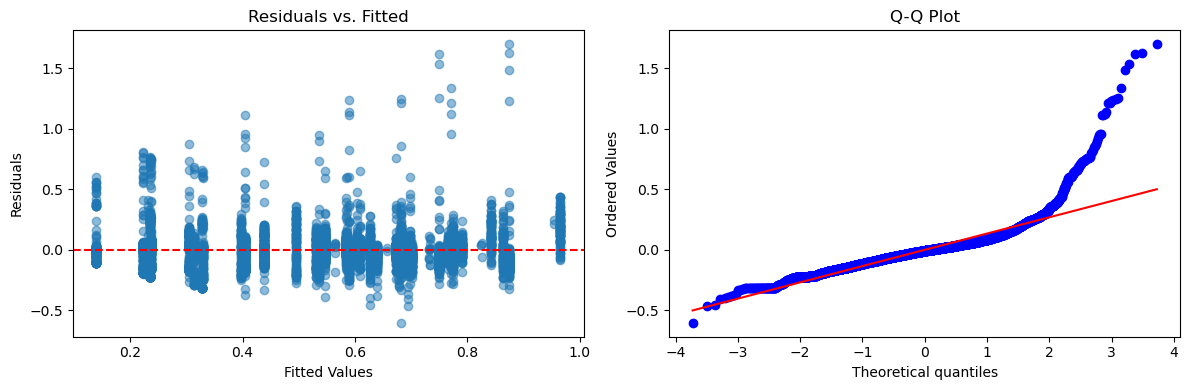

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residuals vs Fitted
axes[0].scatter(results_h1.fittedvalues, results_h1.resid, alpha = 0.5)
axes[0].axhline(0, color = 'red', linestyle = '--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs. Fitted')

# Q-Q plot
stats.probplot(results_h1.resid, dist = "norm", plot = axes[1])
axes[1].set_title('Q-Q Plot')
plt.tight_layout()
plt.show()

In the future, we could explore strategies like robust regression techniques or transformation of dependent variable (e.g. log-transformation) to better fulfill the normality assumption.

### Interpretation and Post-Hoc Tests

Important to note: all coefficients are interpreted relative to the reference categories: NYC Subway (Agency) on weekdays (day type) in 2020 (year).

**Model Coefficients**
- **Intercept (β₀ = 0.2368)**: Baseline recovery rate for subway weekdays in 2020 is $23.68\%$.
- **Weekend effect** ($\beta_w = 0.092, p < 0.001$): Recovery rates are $9.2$ percentage points higher on weekends than weekdays.
- **LIRR × 2024 Interaction** ($\gamma_{\text{LIRR}\times\text{2024}} = 0.1901, p < 0.001$)**: By 2024, LIRR's recovery rate exceeded that of the subway by $19$ percentage points.

The initial OLS model yielded a Durbin-Watson statistic $d = 0.939$, which is deemed evidence of strong positive autocorrelation in the residuals. This was expected due to the time-series nature of the dataset and the weekly seasonality inherent in daily figures. We thus employed Newey-West HAC Robust SEs with the same rationale as in Hypothesis I.

The results above confirm our hypothesis that the recovery rates of commuter rails diverged significantly from the subway baseline, particularly beginning the year 2023.

- While statistically identical to the NYC subway in early recovery, the recovery rates of both LIRR ($\beta_{\text{LIRR}\times\text{2023}}=0.091, p=0.019$) and MNR ($\beta_{\text{MNR}\times\text{2023}}=0.106, p = 0.002$) began to diverge significantly in 2023. The gap widens in the year 2024 (LIRR: $0.1901$, MNR: $0.1700$, $p<0.001$).
- The opposite holds for Buses: despite an initial recovery spurt from the subway rates ($\beta_{\text{Buses}\times\text{2021}} = 0.1099, p = 0.041$), by the year 2024 it reverses into significant underperformance ($\beta_{\text{Buses}\times\text{2024}} = -0.1117, p = 0.029$).
- The `is_weekend` coefficient is positive and significant ($\beta_w = 0.092, p < 0.001$), and the model suggests that recovery rates across all agencies and years are 9.2 percentage points higher on weekends than weekdays.

In addition to the multiple regression model, we performed **post-hoc Wald tests of linear restrictions** to examine how recovery rates of the LIRR, MNR, and Buses differed among each other by the year 2024. Furthermore, to control for family-wise error rate (probability of making at least one type I error), we applied a Bonferroni correction on the existing $\alpha = 0.05$ significance level, yielding the new significance level $\alpha_B = \frac{0.05}{3} \approx 0.0167$.

In [7]:
lirr_2024 = "C(Agency, Treatment('Subway'))[T.LIRR]:C(year, Treatment(2020))[T.2024]"
mnr_2024 = "C(Agency, Treatment('Subway'))[T.MNR]:C(year, Treatment(2020))[T.2024]"
bus_2024 = "C(Agency, Treatment('Subway'))[T.Bus]:C(year, Treatment(2020))[T.2024]"

test_lirr_mnr = results_h1.t_test(f"{lirr_2024} = {mnr_2024}")
test_lirr_bus = results_h1.t_test(f"{lirr_2024} = {bus_2024}")
test_mnr_bus = results_h1.t_test(f"{mnr_2024} = {bus_2024}")

print(f"LIRR vs. MNR:  p = {test_lirr_mnr.pvalue.item():.4f}")
print(f"LIRR vs. Bus:  p = {test_lirr_bus.pvalue.item():.4f}")
print(f"MNR vs. Bus:   p = {test_mnr_bus.pvalue.item():.4f}")

# Bonferroni Correction
alpha = 0.05 / 3
print(f"\nBonferroni Corrected Significance Threshold: p < {alpha:.4f}")

LIRR vs. MNR:  p = 0.5880
LIRR vs. Bus:  p = 0.0000
MNR vs. Bus:   p = 0.0000

Bonferroni Corrected Significance Threshold: p < 0.0167


- For LIRR vs. MNR ($p = 0.5880 > 0.0167$), we fail to reject the null hypothesis ($H_0: \text{Diff}=0$). We find no statistically significant difference between the two commuter services.
- For LIRR vs. Buses and MNR vs. Buses, $p < 0.0001$, we reject the null hypothesis, finding that the surge in commuter rail ridership is distinct from the stagnation in buses.

### Hypothesis II

In the following section, we build two multiple linear regression models to test Hypothesis II. In addition to fitting the regression model with `statsmodels.formula.api`, we check for autocorrelation by computing the Durbin-Watson statistic.

Below, additional pre-processing steps are undertaken:

- Addition of indicator variables `is_commuter` and `period`
- Elimination of 2020 data points
- Separation of dataset into distinct sub-datasets by commuter status

Specifically, we exclude data from 2020 from consideration to isolate the stable, structural recovery phases (2021-2022 vs. 2023-2024) from the acute chaos of the initial COVID-19 lockdown period spanning most of 2020.

In [8]:
# define new column: is_commuter
# 0 if Subway or Bus, 1 if LIRR or MNR
data['is_commuter'] = data['Agency'].isin(['LIRR', 'MNR']).astype(int)

# define new column: period
# 0 if year is 2021 or 2022, 1 if year is 2023 or 2024
# additionally, we should drop 2020 data for this hypothesis
data = data[data['year'] >= 2021].copy()
data['period'] = data['year'].apply(lambda x: 1 if x >= 2023 else 0)

# split data set by commuter vs non-commuter
commuter_data = data[data['is_commuter'] == 1].copy()
urban_data = data[data['is_commuter'] == 0].copy()

In [9]:
# Fit separate linear models, but unified formula
formula_h2 = "recovery_rate ~ C(is_weekend) * C(period)"
model_commuter = smf.ols(formula = formula_h2, data = commuter_data).fit()
model_urban = smf.ols(formula = formula_h2, data = urban_data).fit()

# compute D-W statistics
dw_commuter = sm.stats.stattools.durbin_watson(model_commuter.resid)
dw_urban = sm.stats.stattools.durbin_watson(model_urban.resid)
print(f'Commuter D-W statistic: {dw_commuter:.4}; \
      {'is' if dw_commuter < 1.5 or dw_commuter > 2.5 else 'is not'} \
        significant autocorrelation.')
print(f'Urban D-W statistic: {dw_urban:.4}; \
      {'is' if dw_urban < 1.5 or dw_urban > 2.5 else 'is not'} \
        significant autocorrelation.')

Commuter D-W statistic: 0.9901;       is         significant autocorrelation.
Urban D-W statistic: 0.8576;       is         significant autocorrelation.


The Durbin-Watson statistics of $0.9901$ (commuter) and $0.8576$ (urban) suggest that there is significant positive autocorrelation for both models, which guides us to utilize Newey-West robust SEs. As with before, we will invoke `get_robustcov_results()` before printing and interpreting the model summary.

In [10]:
results_commuter = model_commuter.get_robustcov_results(cov_type = 'HAC', maxlags = 7)
results_urban = model_urban.get_robustcov_results(cov_type = 'HAC', maxlags = 7)

In [11]:
# Commuter Model Summary
# NOTE :: The OLS output is attached as a screenshot.
# print(results_commuter.summary())

<img src="commuter.png" width="1000">

In [12]:
# Urban Model Summary
# NOTE :: The OLS output is attached as a screenshot.
# print(results_urban.summary())

<img src="urban.png" width="1000">

### Interpretation and Post-Hoc Tests

The initial OLS model yielded Durbin-Watson statistics $d_\text{commuter} = 0.9901, d_\text{urban} = 0.8576$, both evidence of strong positive autocorrelation in the residuals in a similar fashion to Hypothesis I. We thus employed Newey-West HAC Robust SEs.

- The interaction term $\beta_{wp} = 0.0745$ ($p < 0.001$) suggests that the "weekend bonus" for commuter rails increased by $7.5$ percentage points since 2023 compared to the early recovery phase.
- For urban transit, the interaction term $\alpha_{wp} = 0.0222$ ($p = 0.004$), similarly suggesting an increase of the "weekend bonus" for urban transit by $2.2$ percentage points. Though statistically significant, the magnitude of increase isn't as pronounced as commuter services.

Below, we perform a **Wald Z-Test** to confirm that the structural shift from the early to late recovery phases is significantly larger for Commuter Rails than for Urban Transit. The $Z$-score is computed as follows:

$$Z=\frac{\beta_{wp}-\alpha_{wp}}{\sqrt{\operatorname{SE}(\beta_{wp})^2 + \operatorname{SE}(\alpha_{wp})^2}}$$

The test assumes independence of samples, which is achieved by the perfect separation of the dataset on the `is_commuter` indicator variable. Below we test the null hypothesis ($H_0: \beta_{wp} = \alpha_{wp}$) against the alternative hypothesis ($H_1: \beta_{wp} > \alpha_{wp}$).

In [13]:
# define term name in common between models
# then extract beta and SE for that term from both models
term = "C(is_weekend)[T.1]:C(period)[T.1]"
commuter_index, urban_index = \
    results_commuter.model.exog_names.index(term), \
    results_urban.model.exog_names.index(term)
beta_commuter, se_commuter = \
    results_commuter.params[commuter_index], \
    results_commuter.bse[commuter_index]
beta_urban, se_urban = results_urban.params[urban_index], \
    results_urban.bse[urban_index]

# compute Z-score and p-value using Gaussian CDF
# since one-tailed test, keep p-value as is
z_score = (beta_commuter - beta_urban) / np.sqrt(se_commuter**2 + se_urban**2)
p_value = 1 - stats.norm.cdf(abs(z_score))

print(f"Z-score: {z_score:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")

Z-score: 3.3522
One-tailed p-value: 0.0004


With a $p=0.0004$, at the $\alpha=0.05$ significance level we reject the null hypothesis; it is statistically evident that the structural shift from the early to late recovery phases is significantly larger for Commuter Rails than for Urban Transit.

## Evaluation of Significance

Our analyses provide strong statistical evidence to reject the null hypotheses for both preregistered statements. The data does not support a uniform recovery; rather, it reveals a distinct "Three-Tiered Recovery" driven by structural shifts in modal preference.

### Hypothesis I

Our multiple linear regression analysis confirmed a statistically significant break in recovery trajectories beginning in 2023 (with the NYC Subway as the middle-ground baseline).

- Though the NYC Bus system initially outperformed the Subway system in 2021 ($\beta_{\text{Buses}\times\text{2021}} = 0.1099, p = 0.041$), it did not display statistically significant deviations in recovery rate until 2024, when it underperformed compared to the subway ($\beta_{\text{Buses}\times\text{2024}} = -0.1117, p = 0.029$).
- The commuter rail networks (LIRR/MNR) successfully decoupled from the baseline starting 2023, with both interaction terms increasing in magnitude from 2023 ($~0.1~$) to 2024 ($~0.19$) ($p < 0.05$ for all).
- Post-hoc testing revealed a significant gap between the LIRR/MNR and Buses' recovery trajectories ($p < 0.001$) but not between the LIRR and MNR ($p = 0.5880$). The tests effectively answer whether the observed gaps between LIRR/MNR and Buses are real or simply by random chance.

Overall, the results validate our "urban flight" context that the suburban ridership base appears more resilient or has retained more travel utility than the urban core.

### Hypothesis II

Our branched multiple regression model identified a significant divergence in the "weekend bonus" phenomenon, driven by both the increase in discretionary travel and adoption of hybrid/remote work.

- The difference in the "weekend shift" between commuter rail and urban transit ($Z = 3.3522, p = 0.0004$) is statistically significant.
- The central implication of this finding is that commuter rail has in recent years come to serve purposes beyond commuting. Our observation that the recovery benefit for commuters grew $\frac{0.0745}{0.0222} \approx 3.356$ fold for LIRR/MNR as opposed to urban transit suggests a functional transformation of these networks into discretionary/leisure services, likely supporting hybrid workers living in the suburbs who travel into the city for entertainment rather than daily work.

Figure 4 illustrates the Divergence (H1) and the "Weekend Shift" (H2).

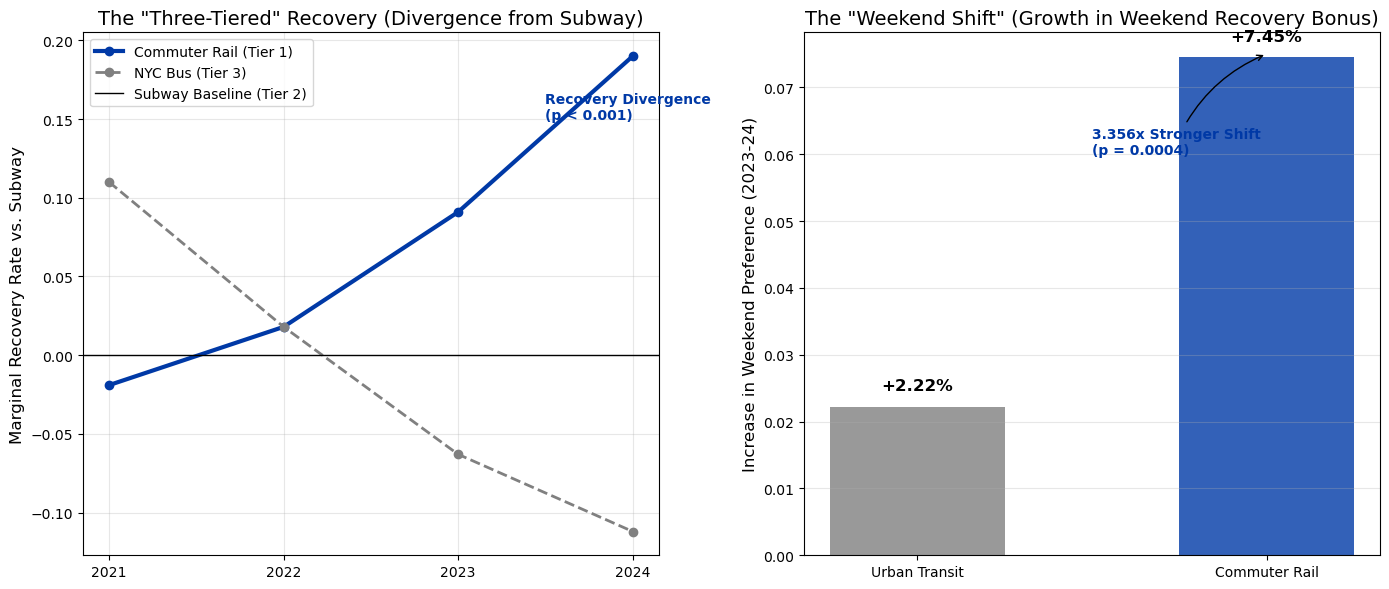

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

# Using the interaction coefficients from Hypothesis 1
years = [2021, 2022, 2023, 2024]
commuter_trend = [-0.019, 0.018, 0.091, 0.190]
bus_trend = [0.110, 0.018, -0.063, -0.112]

axes[0].plot(years, commuter_trend, marker = 'o', 
             label = 'Commuter Rail (Tier 1)', color = '#0039A6', linewidth = 3)
axes[0].plot(years, bus_trend, marker = 'o', 
             label = 'NYC Bus (Tier 3)', color = 'gray', linestyle = '--', linewidth = 2)
axes[0].axhline(0, color = 'black', 
                linewidth = 1, label = 'Subway Baseline (Tier 2)')
axes[0].set_title('The "Three-Tiered" Recovery (Divergence from Subway)', fontsize = 14)
axes[0].set_ylabel('Marginal Recovery Rate vs. Subway', fontsize = 12)
axes[0].set_xticks(years)
axes[0].legend()
axes[0].grid(True, alpha = 0.3)
axes[0].text(2023.5, 0.15, 'Recovery Divergence\n(p < 0.001)', 
             color = '#0039A6', fontweight = 'bold')

# Comparing the Increase in Weekend Bonus; interaction coefficients from H2

modes = ['Urban Transit', 'Commuter Rail']
shift = [0.0222, 0.0745]

bars = axes[1].bar(modes, shift, color = ['gray', '#0039A6'], alpha = 0.8, width = 0.5)
axes[1].set_title('The "Weekend Shift" (Growth in Weekend Recovery Bonus)', fontsize = 14)
axes[1].set_ylabel('Increase in Weekend Preference (2023-24)', fontsize = 12)
axes[1].grid(axis = 'y', alpha = 0.3)

for bar in bars:
    axes[1].text(
        bar.get_x() + bar.get_width()/2., 
        bar.get_height() + 0.002,
        f'+{bar.get_height():.2%}', 
        ha = 'center', va = 'bottom', 
        fontweight = 'bold', fontsize = 12
    )

axes[1].annotate(
    '3.356x Stronger Shift\n(p = 0.0004)', 
    xy=(1, 0.075), xytext = (0.5, 0.06),
    arrowprops = dict(arrowstyle = '->', connectionstyle = "arc3,rad=-0.2"),
    fontweight = 'bold', color = '#0039A6'
)

plt.tight_layout()
plt.show()

**Figure 4**. Summary of Divergence and Weekend Shift. **Left**: Year-specific interaction coefficients from Hypothesis I, showing the divergence of commuter rail and NYC bus recovery rates from the baseline (subway). **Right**: Contrast of the increase in weekend preference between early and late recovery periods for urban transit versus commuter rail.

## Conclusion

This study sought to determine whether the post-pandemic recovery of New York's transit system was uniform or structurally divergent between urban and commuter modes. The following conclusions can be drawn from our analyses and can help inform real-world policymaking by the MTA and government agencies at federal, state, and local levels to optimize the quality and operations of public transit in the New York Metropolitan area.

1. We identified a statistically significant pattern of divergence in recovery rates beginning in 2023, with those of commuter rails (LIRR/MNR) soaring past the NYC subway baseline, which remained stagnant, and finally that of NYC Buses stagnating before declining below the baseline in 2024. The hypothesis that suburban modes would recover faster due to demographic shifts ("Urban Flight") is consistent with our findings.
2. Across all agencies, weekend recovery is consistently higher than weekday recovery, hinting at the combined effects of the rise of leisurely travel and dissemination of hybrid/remote work arrangements throughout the metropolitan area.
3.  We found that the shift towards weekend-centric ridership was $3.4$-fold stronger for commuter rails than urban transit, suggesting the gradual transition of the LIRR/MNR from purely commuter services to versatile train networks for suburbanites.

Our findings thus point towards some realistic **policy implications** for the MTA:
- Increased weekend service frequency for LIRR/MNR, as evidenced by the $3.4$-fold stronger weekend shift
- The declining bus recovery rate demands attention, especially considering its utilization by low-income and marginalized citizens; consider fare incentives or route optimization.
- Hybrid work patterns may necessitate moving away from traditional monthly passes to more flexible structures for commuter fares. This is vital for the MTA's service quality, financial viability, and common-sense public investments.

## Limitations

While our analysis reveals significant structural trends, limitations regarding data gaps and potential adverse societal implications are to be acknowledged.

- **Data Gaps and Imperfections**
    - The methodologies behind ridership estimation can be fraught with imperfections in the system, such as fare evasion and free-ride programs. Whereas ridership in commuter services is tallied manually, NYC subway and buses rely on automated systems (akin to an honor system), opening up the possibility of undercounting. The MTA can standardize data collection methodologies (e.g. implementing a standardized fare gate for all agencies).
    - The recovery rates are computed in accordance with 2019 baselines, which may not account well for post-pandemic developments like the opening of new stations or demographic changes. For example, it is possible that a surge in LIRR recovery (greater than 2019 baselines at times) is a result of increased service capacity rather than genuine demand recovery. Future studies could use rolling baselines that account for service changes or compute up-to-date recovery rates with a basis on recent demographic changes.
- **Model Shortcomings**
    - Broader societal patterns surrounding public transportation use patterns cannot be overlooked; using the results as justification for sweeping disinvestment can prove dangerous. For instance, a proposal for free buses based on its stagnant recovery pattern can exacerbate transit inequity, especially when conflated with an actual decline in demand.
    - In spite of the statistically significant results that support certain narratives such as the "weekend shift," the LIRR/MNR are still commuter networks at their core. The findings should not be definitive evidence towards reduced regular commuter services that risk alienating regular commuters.
    - Our OLS regression model rely on several (often tenuous) assumptions, including independent observations, normally distributed errors, and homoscedascity. We observed mild heteroscedasticity and a heavy tail at high extremes in our Q-Q plot, indicating some deviation from Gaussianity. Furthermore, while Newey-West robust SEs were implemented to account for the temporal, autocorrelated nature of our data, a bona fide time series model like ARIMA may be better suited for similar studies.

## Acknowledgements and Bibliography

1. Federal Transit Administration. (2024, August). Effects of the COVID-19 Pandemic on Transit Ridership and Accessibility (Report No. 0268). U.S. Department of Transportation. https://www.transit.dot.gov/sites/fta.dot.gov/files/2024-08/FTA-Report-0268-Effects-of-the-COVID-19-Pandemic-on-Transit-Ridership-and-Accessibility.pdf
2. Zheng, Y., & Zhao, J. (2024). Impacts of remote work on vehicle miles traveled and transit ridership in the USA. Nature Cities, 1, 306–315. https://www.researchgate.net/publication/379698853_Impacts_of_remote_work_on_vehicle_miles_traveled_and_transit_ridership_in_the_USA
3. TransitCenter. (2023, April 7). Transit’s Looming Fiscal Cliff: How Bad is it and What Can We Do? https://transitcenter.org/transits-fiscal-cliff-why-we-need-a-new-funding-paradigm/
4. DiNapoli, T. P. (2022, May). Taxpayer Movement During the Pandemic. Office of the New York State Comptroller. https://www.osc.ny.gov/files/reports/pdf/taxpayer-movement-during-pandemic.pdf
5. Kuntzman, G. (2025, January 6). Afraid of Crime in the Subway? It's All in Your Head, NYPD Stats Say. Streetsblog NYC. https://nyc.streetsblog.org/2025/01/06/afraid-of-crime-in-the-subway-its-all-in-your-head-nypd-stats-say
6. Partnership for New York City. (2022, May). Return to Office Survey Results. https://pfnyc.org/research/return-to-office-survey-results-may-2022/
7. Lander, B. (2023, March). Riders Return: February 2023 Snapshot. Office of the New York City Comptroller. https://comptroller.nyc.gov/wp-content/uploads/documents/Riders-Return-February-2023-Snapshot.pdf
8. Metropolitan Transportation Authority. (2023, May 31). MTA Commuter Railroads Set Post-Pandemic Ridership Records [Press release]. https://www.mta.info/press-release/mta-commuter-railroads-set-post-pandemic-ridership-records
9. Paternoster, R., Brame, R., Mazerolle, P., & Piquero, A. (1998). Using the Correct Statistical Test for the Equality of Regression Coefficients. Criminology, 36(4), 859-866. https://doi.org/10.1111/j.1745-9125.1998.tb01268.x
10. Wooldridge, Jeffrey M., 1960-. (2012). Introductory econometrics : a modern approach. Mason, Ohio :South-Western Cengage Learning. 
11. Newey, W. K., & West, K. D. (1987). A Simple, Positive Semi-Definite, Heteroskedasticity and Autocorrelation Consistent Covariance Matrix. Econometrica, 55(3), 703–708. https://doi.org/10.2307/1913610
12. Python Software Foundation. Python Language Reference, version 3.13.5. Available at http://www.python.org. Used libraries: pandas, numpy, statsmodels, scipy, matplotlib.